In [1]:
#import packages
import requests
import json
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
import datetime


In [2]:
df = pd.read_csv("./TDx_tracker.csv")

In [3]:
df.head()

,date,park,alert name,description,event type,road name,vehicle impact,event start date,event end date
0,2024-02-05,Crater Lake National Park,Heavy Snowfall,Road from Park Headquarters to Rim Village is ...,incident,['Munson Valley Road from Park Headquarters to...,all-lanes-closed,2024-02-04T13:50:00Z,No end date
1,2024-02-05,Crater Lake National Park,Heavy Snowfall,Road from Park Headquarters to Rim Village is ...,incident,['Munson Valley Road from Park Headquarters to...,all-lanes-closed,2024-02-04T13:50:00Z,No end date
2,2024-02-05,Crater Lake National Park,Seasonal Road Closure,"North Entrance Road, West Rim Drive, and East ...",incident,"['North Entrance Road', 'East Rim Drive', 'Pin...",all-lanes-closed,2023-11-01T12:19:00Z,No end date
3,2024-02-05,Crater Lake National Park,Seasonal Road Closure,"North Entrance Road, West Rim Drive, and East ...",incident,"['North Entrance Road', 'East Rim Drive', 'Pin...",all-lanes-closed,2023-11-01T12:19:00Z,No end date
4,2024-02-05,Crater Lake National Park,Seasonal Road Closure,"North Entrance Road, West Rim Drive, and East ...",incident,"['North Entrance Road', 'East Rim Drive', 'Pin...",all-lanes-closed,2023-11-01T12:19:00Z,No end date


In [4]:
df.shape

(117, 9)

In [6]:
df.park.value_counts()

Mojave National Preserve                 17
Crater Lake National Park                14
Shenandoah National Park                 14
Yosemite National Park                    8
Bryce Canyon National Park                8
Acadia National Park                      7
Padre Island National Seashore            6
Dinosaur National Monument                6
Fort Point National Historic Site         5
Zion National Park                        4
Golden Gate National Recreation Area      4
Natchez Trace Parkway                     4
Point Reyes National Seashore             4
Olympic National Park                     4
Redwood National Park                     3
Organ Pipe Cactus National Monument       2
Valley Forge National Historical Park     2
Death Valley National Park                2
Guadalupe Mountains National Park         2
Muir Woods National Monument              1
Name: park, dtype: int64

In [7]:
len(df.park.unique())

20

In [8]:
df.date.value_counts()

2024-02-05    61
2023-10-23    11
2023-10-17    11
2024-02-01     8
2024-01-11     5
2024-01-18     4
2023-12-18     4
2023-11-27     4
2024-01-25     3
2024-01-04     3
2023-12-28     3
Name: date, dtype: int64

In [11]:
df = df.sort_values(by=['date'])

In [14]:
running_park_list = []
date_list = []
park_count_list = []

for x in df.date.unique():
    df_date = df.loc[df['date']==x]
    print(x, ": ", len(df_date))
    for y in df_date['park']:
        if y not in running_park_list:
            print(y)
            running_park_list.append(y)
    date_list.append(x)
    park_count_list.append(len(running_park_list))

2023-10-17 :  11
Golden Gate National Recreation Area
Yosemite National Park
Mojave National Preserve
Acadia National Park
Olympic National Park
Dinosaur National Monument
Natchez Trace Parkway
2023-10-23 :  11
2023-11-27 :  4
Padre Island National Seashore
2023-12-18 :  4
Muir Woods National Monument
Fort Point National Historic Site
2023-12-28 :  3
2024-01-04 :  3
2024-01-11 :  5
Shenandoah National Park
2024-01-18 :  4
2024-01-25 :  3
2024-02-01 :  8
2024-02-05 :  61
Redwood National Park
Crater Lake National Park
Zion National Park
Point Reyes National Seashore
Bryce Canyon National Park
Guadalupe Mountains National Park
Valley Forge National Historical Park
Organ Pipe Cactus National Monument
Death Valley National Park


In [15]:
park_count_list

[7, 7, 8, 10, 10, 10, 11, 11, 11, 11, 20]

In [23]:
df_count = pd.DataFrame({
    'date': date_list,
    "count of parks": park_count_list
})
df_count['date'] = pd.to_datetime(df_count['date'])
print(df_count['date'].dtypes)


datetime64[ns]


In [19]:
df_count

,date,count of parks
0,2023-10-17,7
1,2023-10-23,7
2,2023-11-27,8
3,2023-12-18,10
4,2023-12-28,10
5,2024-01-04,10
6,2024-01-11,11
7,2024-01-18,11
8,2024-01-25,11
9,2024-02-01,11


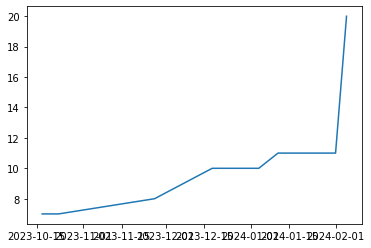

In [25]:
plt.plot(df_count.date, df_count['count of parks'])



[]

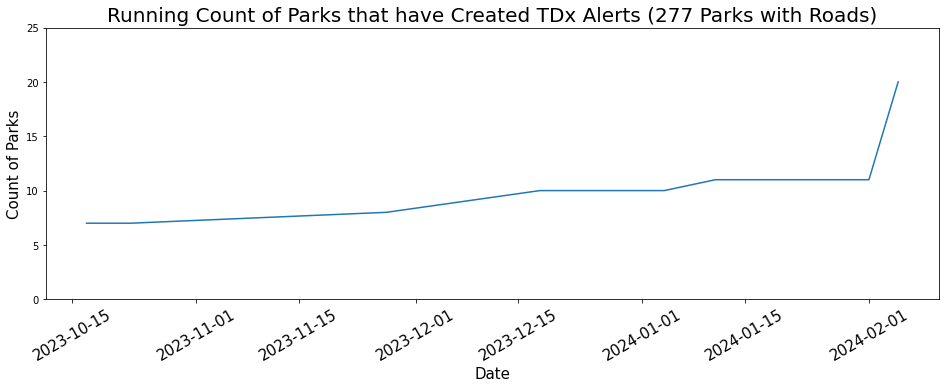

In [32]:
# Adjusting the figure size
fig = plt.subplots(figsize=(16, 5))

# Creating a plot
plt.plot(df_count.date, df_count['count of parks'])

# Adding a plot title and customizing its font size
plt.title('Running Count of Parks that have Created TDx Alerts (277 Parks with Roads)', fontsize=20)

# Adding axis labels and customizing their font size
plt.xlabel('Date', fontsize=15)
plt.ylabel('Count of Parks', fontsize=15)

# Rotaing axis ticks and customizing their font size
plt.xticks(rotation=30, fontsize=15)
plt.ylim([0,max(df_count['count of parks'])*1.25])

# Changing the plot resolution - zooming in the period from 15.12.2022 till 15.01.2023
#plt.xlim(pd.Timestamp('2023-09-1'), pd.Timestamp('2024-02-15'))
plt.plot()
